# Baseboard Design Reference Document

The baseboard module contains all the signal and power IO for the effects module. Input voltage of 9-24V DC is regulated to +/- 9V to drive a split-rail op-amp and to +5V (or +3.3V) to drive the LED indicators and switching relays. The audio input and output are routed to the effects board via the relay switching circuitry.

In order to generate plots and perform design analysis, packages must be imported below:

In [3]:
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('refdoc.mplstyle')
from matplotlib.ticker import EngFormatter

# define formatter for frequency
formatter_Hz = EngFormatter(unit='Hz', sep="")

#define formatter for dBV
formatter_dBV = EngFormatter(unit='dBV', sep="")

### Relevant Specifications

1.  Power
    1.  The Baseboard shall provide a ± 9V, ± 1% power supply capable of sourcing ± 200mA peak to the audio effects board
    2.  The baseboard shall provide low-voltage power circuitry capable of operation from +1.2V, ± 1% to +5V, ± 1% and capable of sourcing 150mA peak to drive local peripherals
    3.  Noise from any power supply must be below -40dB at all frequencies and below -60dB above 100Hz
2.  Input/Output
    1.  The Baseboard shall route the audio signal to the baseboard while providing a true bypass path directly to the output
    2.  The Baseboard shall provide input impedance of 1MΩ ± 1% and output impedance of 49.9kΩ ± 1%
3.  Switching
    1.  The audio signal shall be switched using electromechanical relays or contactors to maximize durability and signal integrity

## System Block Diagram

## Circuit Design
Overview

### Input

#### Input Protection

#### Input Filter

#### Differential to Single-ended Converter

### Output

#### Output Protection

#### Output Filter

#### Differential to Single-ended Converter

### Switching

#### Switching Paths

#### Bypass

### Microcontroller

### Power

#### 1.3 Output Power Noise

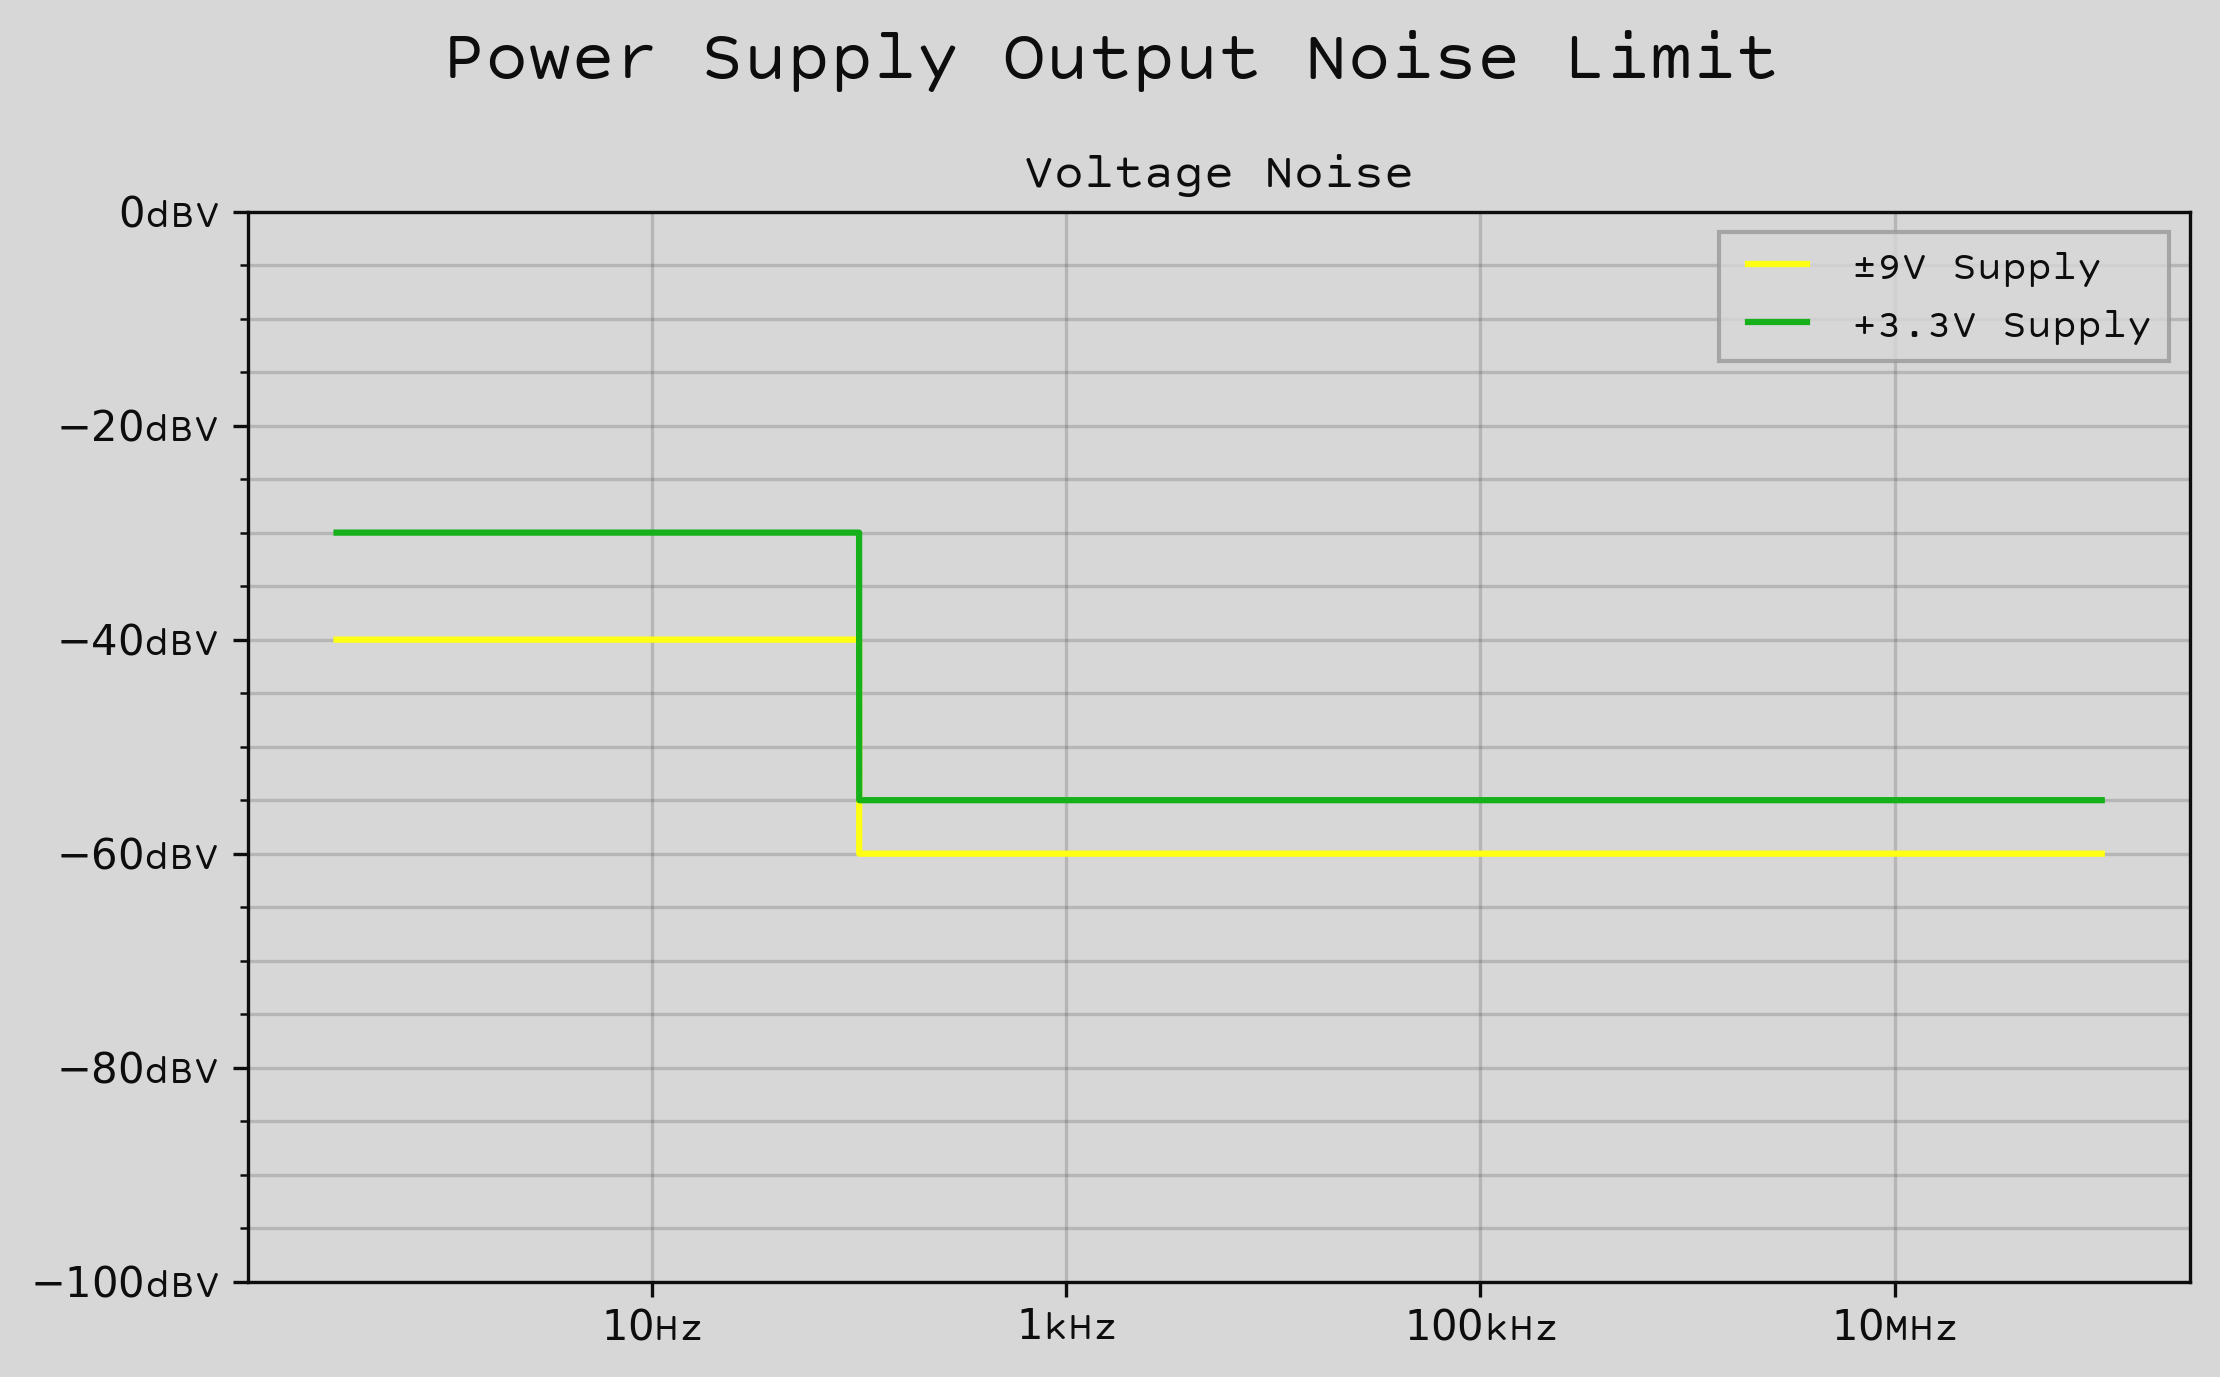

In [4]:
min_freq = 0.3
max_freq = 100000000
frequency = np.logspace(np.log10(min_freq), np.log10(max_freq), 30000, base=10)

noise_spec_9V = []
noise_spec_LV = []

corner_freq_9V = 100
corner_freq_LV = 100

for freq in frequency:
    if freq < corner_freq_9V:
        noise_spec_9V.append(-40)
    else:
        noise_spec_9V.append(-60)
    
    if freq < corner_freq_LV:
        noise_spec_LV.append(-30)
    else:
        noise_spec_LV.append(-55)

fig, ax = plt.subplots(1, 1)

ax.plot(frequency, noise_spec_9V, label='±9V Supply')
ax.plot(frequency, noise_spec_LV,label='+3.3V Supply')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(formatter_Hz)

ax.yaxis.set_major_formatter(formatter_dBV)
ax.set_ylim(-100, 0)
ax.set_title("Voltage Noise")
fig.suptitle("Power Supply Output Noise Limit")
ax.legend()
fig.tight_layout()

### Peripherals

### Mechanical